In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
import helpers
import pandas as pd
from skimage import exposure
from PIL import Image
from scipy import ndimage
from skimage.measure import label, regionprops_table, regionprops

In [2]:
filename = 'benoitdata/F20-14A/HA-900_6um_jamtveit_att_pag-2.29_3.40_02043.tif'

img = cv2.imread(filename,0)

(<Figure size 1440x1440 with 2 Axes>, <AxesSubplot:>)

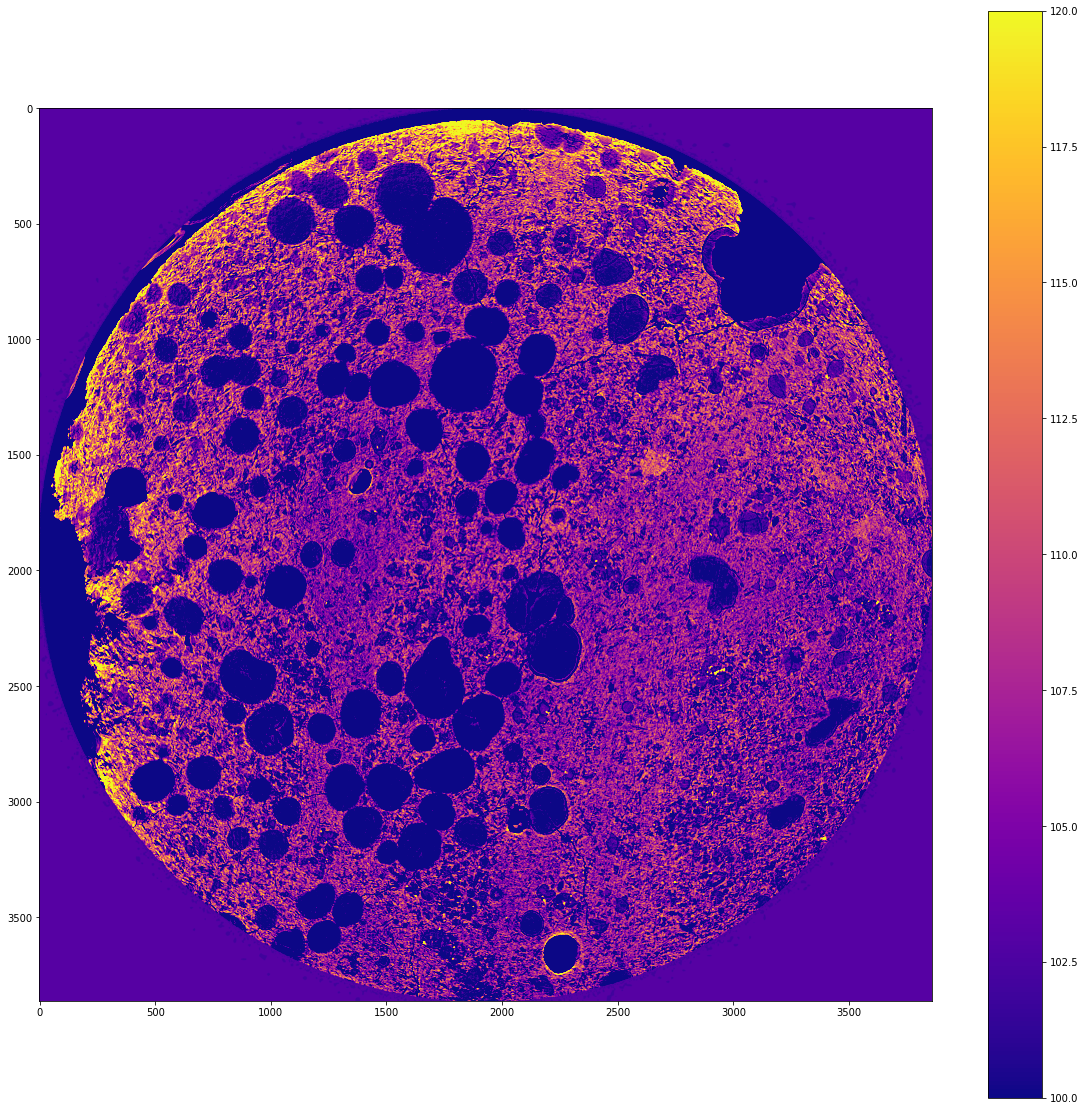

In [26]:
helpers.plot_image(img, vmin=100, vmax=120)

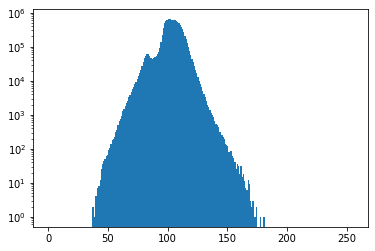

In [29]:
fig, ax = plt.subplots()
# i = helpers.fix_brightness(img)
i = helpers.remove_data_based_on_radius(img, -1)

ax.hist(i.ravel(), bins=np.linspace(0, 255, 256))
ax.set_yscale('log')

(<Figure size 1440x1440 with 2 Axes>, <AxesSubplot:>)

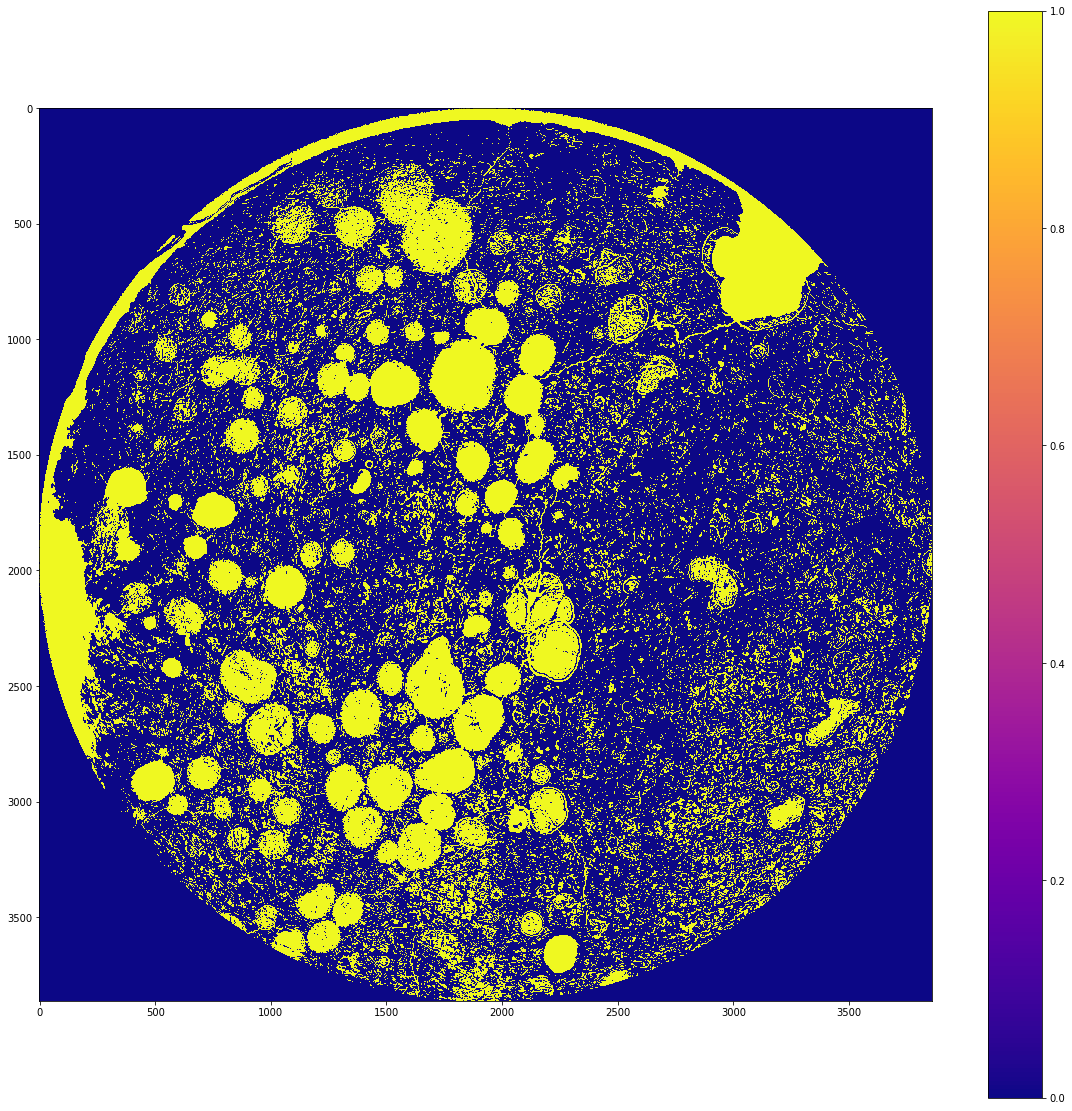

In [31]:
# Otsu's thresholding after Gaussian filtering
i = img.copy()
# i = helpers.fix_brightness(i)
# print(np.unique(i))
# i = abs(i - 255)

i = cv2.GaussianBlur(i,(5,5),0)
ret3, i = cv2.threshold(i, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
i = abs(i - 255)

helpers.plot_image(i, interpolation='none')

array([0, 1], dtype=uint8)

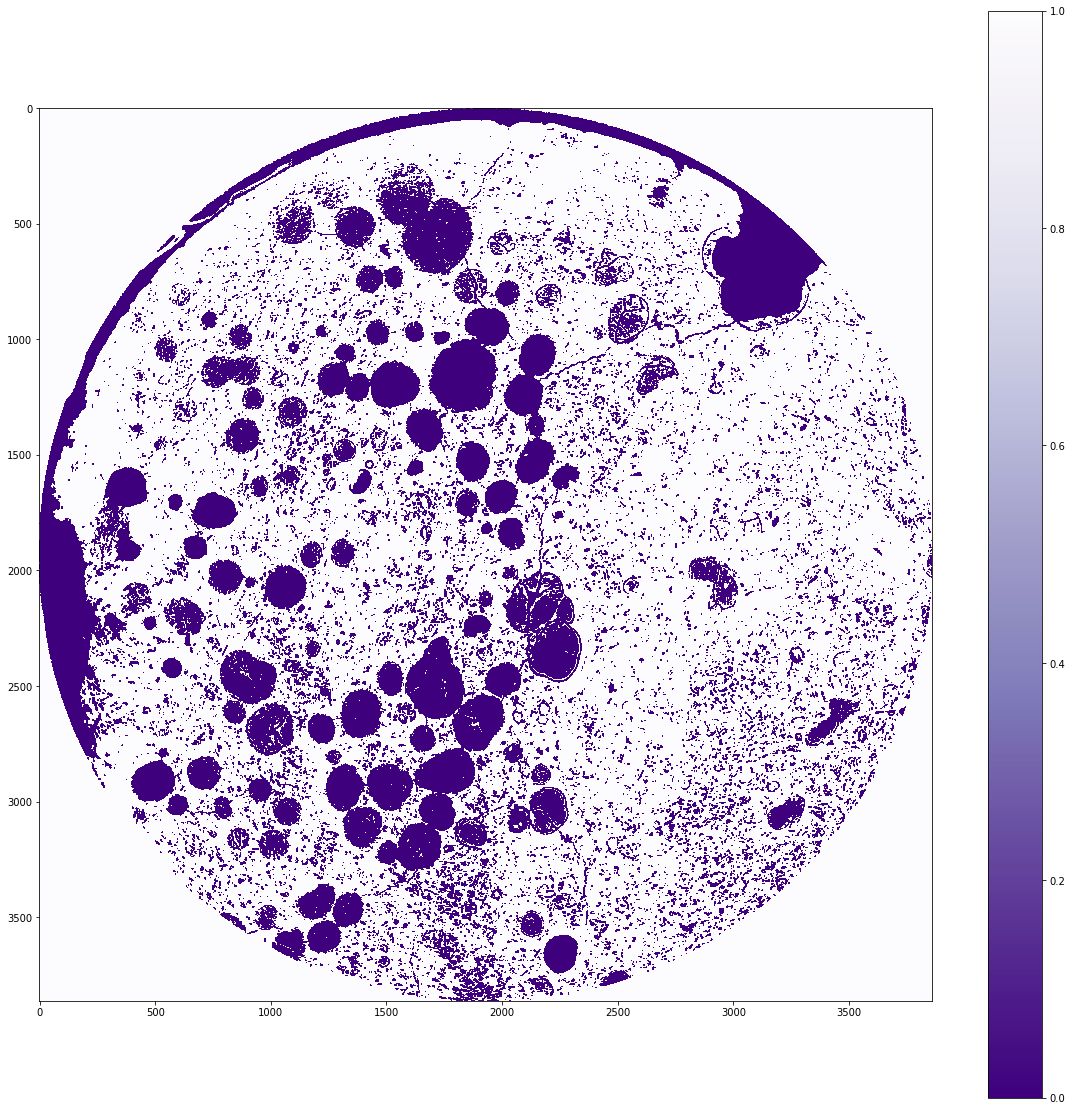

In [32]:
# i = cv2.GaussianBlur(i , (5,5), 0)
# ret3, i = cv2.threshold(i, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

i = cv2.erode(i, np.ones((3, 3), np.uint8))
# i = cv2.erode(i, np.ones((4, 4), np.uint8))

# i = cv2.dilate(i, np.ones((4, 4), np.uint8))
# i = cv2.dilate(i, np.ones((3, 3), np.uint8))
# i = cv2.dilate(i, np.ones((2, 2), np.uint8))
# i = cv2.dilate(i, np.ones((1, 1), np.uint8))
# i = cv2.erode(i, np.ones((4, 4), np.uint8))

i = cv2.GaussianBlur(i,(5,5),0)
ret3, i = cv2.threshold(i, 0, 255, cv2.THRESH_BINARY)
i = abs(i - 255)
i = cv2.erode(i, np.ones((4, 4), np.uint8))
# i = cv2.dilate(i, np.ones((3, 3), np.uint8))

# i = abs(i + 255)

helpers.plot_image(i, cmap='Purples_r', interpolation='none')
np.unique(i)

In [8]:
labeled = label(helpers.remove_data_based_on_radius(abs(i-255)))
df = regionprops_table(labeled, properties=['bbox', 'bbox_area', 'convex_area', 'eccentricity', 'extent', 'label', 'major_axis_length', 'minor_axis_length'])

In [9]:
df = pd.DataFrame(df)

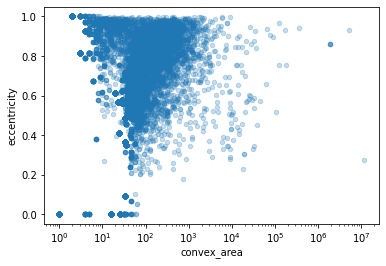

In [10]:
fig, ax = plt.subplots()
df.plot.scatter(x='convex_area', y='eccentricity', ax=ax, alpha=0.25)
ax.set_xscale('log')

(<Figure size 1440x1440 with 2 Axes>, <AxesSubplot:>)

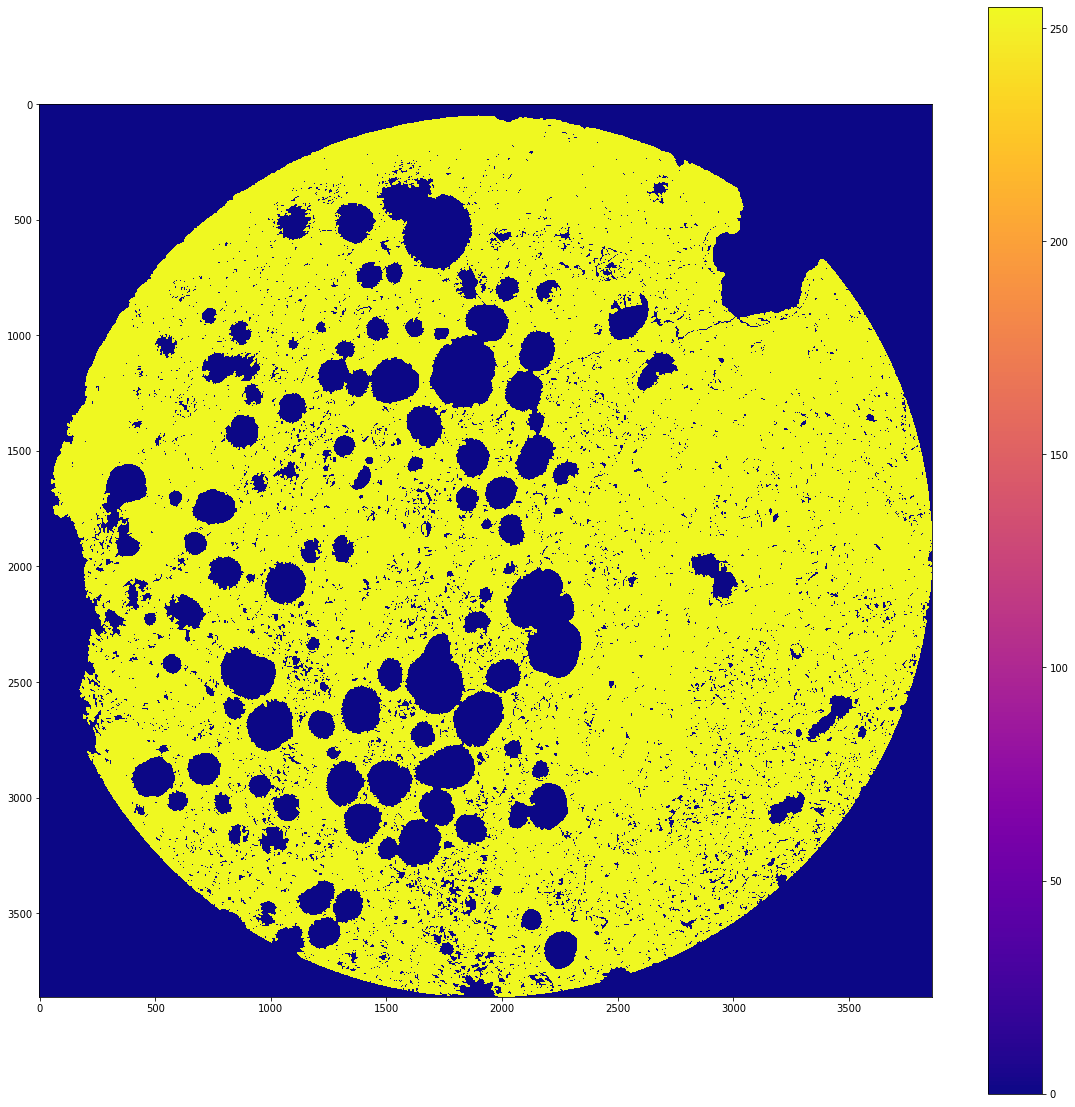

In [18]:
def convert_to_binary(img):
    ones_i = np.where(np.isnan(img), 0, 255).astype(np.uint8)
    return ones_i

imgconvex = np.where(np.isin(labeled, df[df.convex_area > 10000000].label.values), labeled, np.nan)
imgconvex = convert_to_binary(imgconvex)


imgconvex = cv2.dilate(imgconvex, np.ones((5, 5), np.uint8))
# imgconvex = cv2.dilate(imgconvex, np.ones((7, 7), np.uint8))
# imgconvex = cv2.dilate(imgconvex, np.ones((7, 7), np.uint8))
helpers.plot_image(imgconvex, interpolation='none')
# np.unique(imgconvex)